**Ex 9b Implementation of ensemble learning model - AdaBoost and RandomForest Classifiers**

1. Import necessary libraries

numpy and pandas: Used for numerical and tabular data handling.

load_iris: Provides the Iris dataset directly from scikit-learn.

train_test_split: Splits the data into training and testing sets.

AdaBoostClassifier and RandomForestClassifier: Implement the ensemble learning models.

DecisionTreeClassifier: Used as the base learner in AdaBoost.

accuracy_score, classification_report: For performance evaluation.

matplotlib and seaborn: For plotting feature importance and improving visual aesthetics.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


2. Load the dataset and display first few records

iris.data contains the input features (4 columns: sepal and petal length & width).

iris.target contains the output labels: 0 (Setosa), 1 (Versicolor), 2 (Virginica).

iris.target_names gives the string names of the classes.

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


In [ ]:
# Display first 5 samples
print("Feature matrix (X):")
print(X[:5])
print("\nTarget labels (y):")
print(y[:5])


Feature matrix (X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target labels (y):
[0 0 0 0 0]


3. Split the dataset

Splits the dataset into 80% training and 20% testing data.

random_state=42 ensures reproducibility of the split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


4. Train a Random Forest Classifier

Initializes a Random Forest with 100 trees.

Fits the model to the training data.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Predicts labels for test data using the trained model.

In [ ]:
rf_pred = rf_model.predict(X_test)


Provides precision, recall, f1-score for each class.

In [ ]:
print("\n Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=target_names))



 Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



5. Train an AdaBoost Classifier

Initializes AdaBoost with:

Decision Stump as weak learner (max_depth=1)

50 boosting rounds

Learning rate that controls model contribution

Fits AdaBoost on the training data.

In [ ]:
adb_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adb_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

Predicts labels for the test data.

In [ ]:
adb_pred = adb_model.predict(X_test)


Shows detailed performance metrics per class.

In [ ]:
print("\n AdaBoost Classification Report:")
print(classification_report(y_test, adb_pred, target_names=target_names))



 AdaBoost Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



6. Compare Model Accuracies

Calculates and prints the accuracy of each classifier on the test set.

In [ ]:
rf_acc = accuracy_score(y_test, rf_pred)
adb_acc = accuracy_score(y_test, adb_pred)

print(f"\n Accuracy Comparison:")
print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"AdaBoost Accuracy     : {adb_acc * 100:.2f}%")



 Accuracy Comparison:
Random Forest Accuracy: 100.00%
AdaBoost Accuracy     : 93.33%


7. Visualize Feature Importance

Visualizes how much each feature contributes to the model's predictions.

Useful for model interpretability.

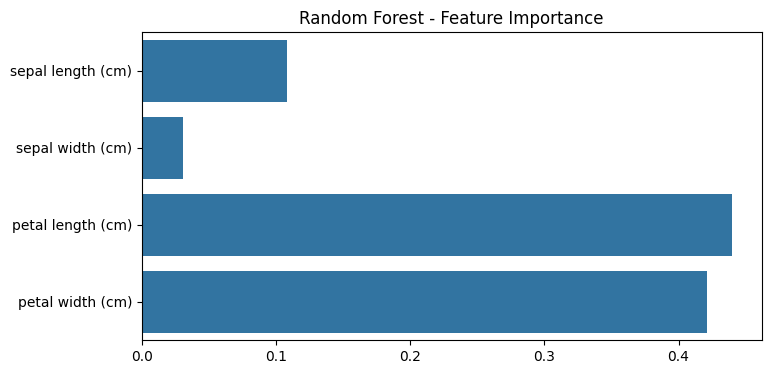

In [ ]:
# Random Forest Feature Importance
plt.figure(figsize=(8, 4))
feat_imp = rf_model.feature_importances_
sns.barplot(x=feat_imp, y=iris.feature_names)
plt.title("Random Forest - Feature Importance")
plt.show()


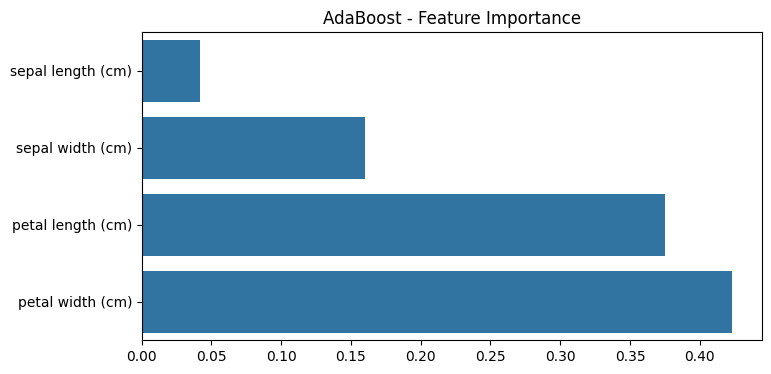

In [ ]:
# AdaBoost Feature Importance
plt.figure(figsize=(8, 4))
adb_imp = adb_model.feature_importances_
sns.barplot(x=adb_imp, y=iris.feature_names)
plt.title("AdaBoost - Feature Importance")
plt.show()
